In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import pandas as pd
from os import listdir
from os.path import isfile, join
from pathlib import Path

<IPython.core.display.Javascript object>

In [3]:
DATADIR = Path(_dh[0]).parent / "data"

<IPython.core.display.Javascript object>

## Collect fragment info from Mpro data

In [4]:
def generate_3D(mol):
    """
    helper function to generate 3D conformations
    """
    m2 = Chem.AddHs(mol)
    AllChem.EmbedMolecule(m2)
    AllChem.UFFOptimizeMolecule(m2)
    return m2

<IPython.core.display.Javascript object>

### non covalent

In [5]:
# collect file names
# mypath = DATADIR + '/fragments/non-covalent/'
# files_noncov = [f for f in listdir(mypath) if isfile(join(mypath, f))]
files_noncov = [
    "Mpro-x0072.pdb",
    "Mpro-x0104.pdb",
    "Mpro-x0107.pdb",
    "Mpro-x0161.pdb",
    "Mpro-x0195.pdb",
    "Mpro-x0305.pdb",
    "Mpro-x0354.pdb",
    "Mpro-x0387.pdb",
    "Mpro-x0395.pdb",
    "Mpro-x0397.pdb",
    "Mpro-x0426.pdb",
    "Mpro-x0434.pdb",
    "Mpro-x0540.pdb",
    "Mpro-x0678.pdb",
    "Mpro-x0874.pdb",
    "Mpro-x0946.pdb",
    "Mpro-x0967.pdb",
    "Mpro-x0991.pdb",
    "Mpro-x0995.pdb",
    "Mpro-x1077.pdb",
    "Mpro-x1093.pdb",
    "Mpro-x1249.pdb",
]
print(len(files_noncov))

22


<IPython.core.display.Javascript object>

### covalent

In [6]:
# collect file names
# mypath =DATADIR + '/fragments/covalent/'
# files_cov = [f for f in listdir(mypath) if isfile(join(mypath, f))]
files_cov = [
    "Mpro-x0689.pdb",
    "Mpro-x0691.pdb",
    "Mpro-x0692.pdb",
    "Mpro-x0705.pdb",
    "Mpro-x0708.pdb",
    "Mpro-x0731.pdb",
    "Mpro-x0734.pdb",
    "Mpro-x0736.pdb",
    "Mpro-x0749.pdb",
    "Mpro-x0752.pdb",
    "Mpro-x0755.pdb",
    "Mpro-x0759.pdb",
    "Mpro-x0769.pdb",
    "Mpro-x0770.pdb",
    "Mpro-x0771.pdb",
    "Mpro-x0774.pdb",
    "Mpro-x0786.pdb",
    "Mpro-x0820.pdb",
    "Mpro-x0830.pdb",
    "Mpro-x0831.pdb",
    "Mpro-x0978.pdb",
    "Mpro-x0981.pdb",
    "Mpro-x1308.pdb",
    "Mpro-x1311.pdb",
    "Mpro-x1334.pdb",
    "Mpro-x1336.pdb",
    "Mpro-x1348.pdb",
    "Mpro-x1351.pdb",
    "Mpro-x1358.pdb",
    "Mpro-x1374.pdb",
    "Mpro-x1375.pdb",
    "Mpro-x1380.pdb",
    "Mpro-x1382.pdb",
    "Mpro-x1384.pdb",
    "Mpro-x1385.pdb",
    "Mpro-x1386.pdb",
    "Mpro-x1392.pdb",
    "Mpro-x1402.pdb",
    "Mpro-x1412.pdb",
    "Mpro-x1418.pdb",
    "Mpro-x1425.pdb",
    "Mpro-x1458.pdb",
    "Mpro-x1478.pdb",
    "Mpro-x1493.pdb",
]
print(len(files_cov))

44


<IPython.core.display.Javascript object>

In [7]:
# read full frgament csv file
df = pd.read_csv(
    DATADIR
    / "Mpro full XChem screen - experiment summary - ver-2020-03-25-annotated.csv",
    sep=";",
    index_col=0,
)
df

,CompoundCode,CompoundSMILES,MountingResult,DataCollectionOutcome,DataProcessingResolutionHigh,RefinementOutcome,Deposition_PDB_ID
CrystalName,,,,,,,
Mpro-x0001,DMSO,NaN,OK: No comment:No comment,Failed - low resolution,"7,11",NaN,NaN
Mpro-x0002,DMSO,NaN,OK: No comment:No comment,Failed - low resolution,"5,21",NaN,NaN
Mpro-x0003,DMSO,NaN,OK: No comment:No comment,Failed - low resolution,"4,14",NaN,NaN
Mpro-x0004,DMSO,NaN,OK: No comment:No comment,success,"2,71",7 - Analysed & Rejected,NaN
Mpro-x0005,DMSO,NaN,OK: No comment:No comment,success,"1,8",7 - Analysed & Rejected,NaN
...,...,...,...,...,...,...,...
NaN,PCM-0102974,CC(C)N(C)C(=O)C1CCN(CC1)C(=O)CCl,FAIL: No comment:No comment,NaN,NaN,NaN,NaN
NaN,PCM-0102275,CC(NC(=O)CCl)c1cccc2ccccc12,FAIL: No comment:No comment,NaN,NaN,NaN,NaN
NaN,PCM-0102879,CC(NC(=O)CCl)c1cc(C)c(C)cc1C,FAIL: No comment:No comment,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

### Extract info for non-covalent fragments

In [19]:
df_frag = pd.DataFrame(columns=["name", "smiles", "mol"])
idx = 0
for f in files_noncov:
    frag_name = Path(f).stem
    if frag_name in df.index:
        smiles = df.loc[frag_name]["CompoundSMILES"]
        mol = AllChem.MolFromSmiles(smiles)
        mol.SetProp("_Name", frag_name)
        df_frag.loc[idx] = [frag_name, smiles, mol]
        idx += 1

<IPython.core.display.Javascript object>

In [20]:
df_frag["mol3D"] = df_frag["mol"].apply(generate_3D)
df_frag.head()

,name,smiles,mol,mol3D
0,Mpro-x0072,CS(=O)(=O)NCCC=1C=CC=CC1,<rdkit.Chem.rdchem.Mol object at 0x7fb3da093f30>,<rdkit.Chem.rdchem.Mol object at 0x7fb3da093c60>
1,Mpro-x0104,CC(=O)NCCC1=CNC=2C=CC(F)=CC12,<rdkit.Chem.rdchem.Mol object at 0x7fb3da14d800>,<rdkit.Chem.rdchem.Mol object at 0x7fb3da0da030>
2,Mpro-x0107,CC(=O)NC=1C=NC=CC1C,<rdkit.Chem.rdchem.Mol object at 0x7fb3da1b1760>,<rdkit.Chem.rdchem.Mol object at 0x7fb3da0da9e0>
3,Mpro-x0161,COC(=O)C=1C=CC(=CC1)S(=O)(=O)N,<rdkit.Chem.rdchem.Mol object at 0x7fb3da1b1440>,<rdkit.Chem.rdchem.Mol object at 0x7fb3da05aa30>
4,Mpro-x0195,CN1CCCC=2C=CC(=CC12)S(=O)(=O)N,<rdkit.Chem.rdchem.Mol object at 0x7fb3da136d00>,<rdkit.Chem.rdchem.Mol object at 0x7fb3da05aad0>


<IPython.core.display.Javascript object>

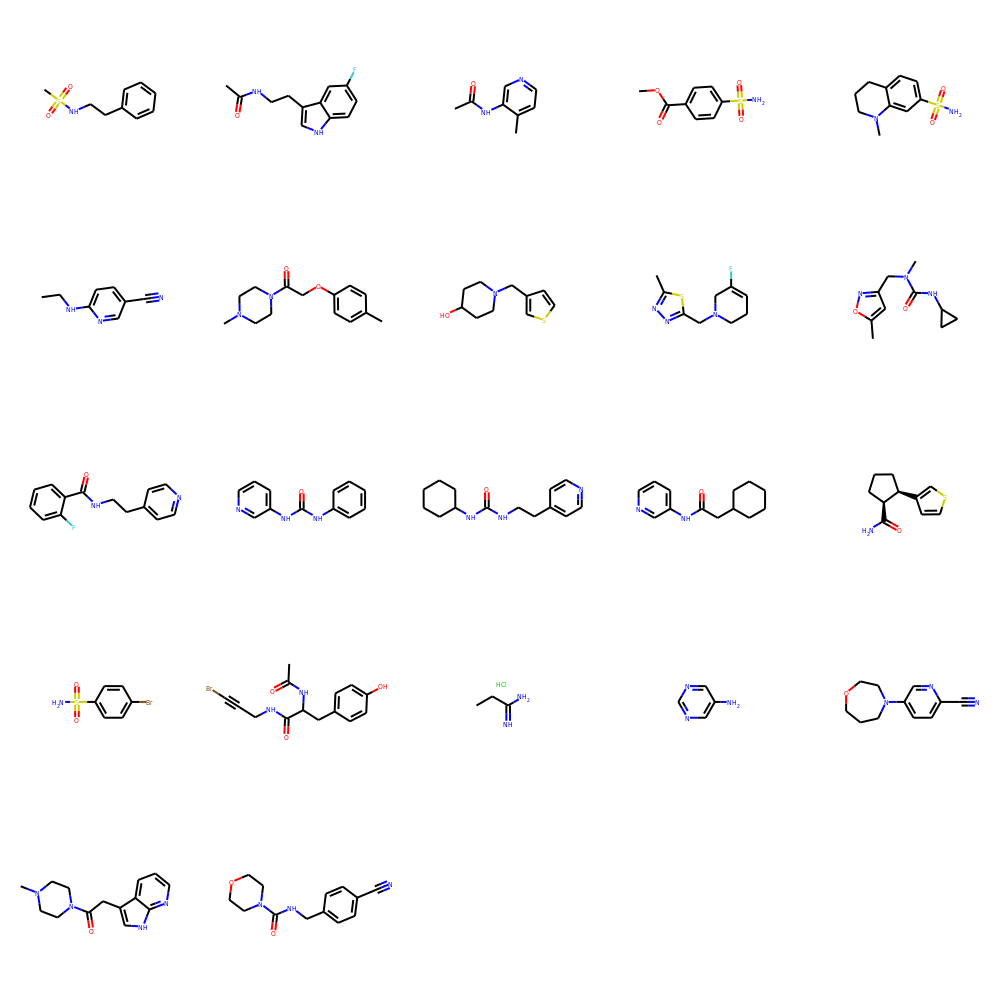

<IPython.core.display.Javascript object>

In [21]:
Draw.MolsToGridImage(df_frag.mol, molsPerRow=5)

In [22]:
# save molecules to sdf
fname = "non_covalent_fragments"
w = Chem.SDWriter(str(DATADIR / "fragments" / f"{fname}_2D.sdf"))
for m in df_frag.mol:
    w.write(m)
w.close()

<IPython.core.display.Javascript object>

In [14]:
# generate 3D if needed
# w = Chem.SDWriter(str(DATADIR / "fragments" / f"{fname}_3D.sdf"))
# for m in df_frag.mol3D: w.write(m)
# w.close()

<IPython.core.display.Javascript object>

### Extract info for covalent fragments

In [23]:
df_frag = pd.DataFrame(columns=["name", "smiles", "mol"])
idx = 0
for f in files_cov:
    frag_name = Path(f).stem
    if frag_name in df.index:
        smiles = df.loc[frag_name]["CompoundSMILES"]
        mol = AllChem.MolFromSmiles(smiles)
        mol.SetProp("_Name", frag_name)
        df_frag.loc[idx] = [frag_name, smiles, mol]
        idx += 1

<IPython.core.display.Javascript object>

In [24]:
df_frag["mol3D"] = df_frag["mol"].apply(generate_3D)
df_frag.head()

,name,smiles,mol,mol3D
0,Mpro-x0689,ClCC(=O)N1CCN(CC1)S(=O)(=O)c2cccs2,<rdkit.Chem.rdchem.Mol object at 0x7fb3da123e40>,<rdkit.Chem.rdchem.Mol object at 0x7fb3da07fda0>
1,Mpro-x0691,Fc1cccc(c1)S(=O)(=O)N2CCN(CC2)C(=O)CCl,<rdkit.Chem.rdchem.Mol object at 0x7fb3da136a80>,<rdkit.Chem.rdchem.Mol object at 0x7fb3da07fb70>
2,Mpro-x0692,Cc1cccc(CN2CCN(CC2)C(=O)CCl)c1,<rdkit.Chem.rdchem.Mol object at 0x7fb3da136b70>,<rdkit.Chem.rdchem.Mol object at 0x7fb3da07f800>
3,Mpro-x0705,Cc1ccc(cc1)C(=O)N2CCN(CC2)C(=O)CCl,<rdkit.Chem.rdchem.Mol object at 0x7fb3da1b16c0>,<rdkit.Chem.rdchem.Mol object at 0x7fb3da07f7b0>
4,Mpro-x0708,ClCC(=O)NNC(=O)c1cc2CCCCc2s1,<rdkit.Chem.rdchem.Mol object at 0x7fb3da07fc60>,<rdkit.Chem.rdchem.Mol object at 0x7fb3da07f760>


<IPython.core.display.Javascript object>

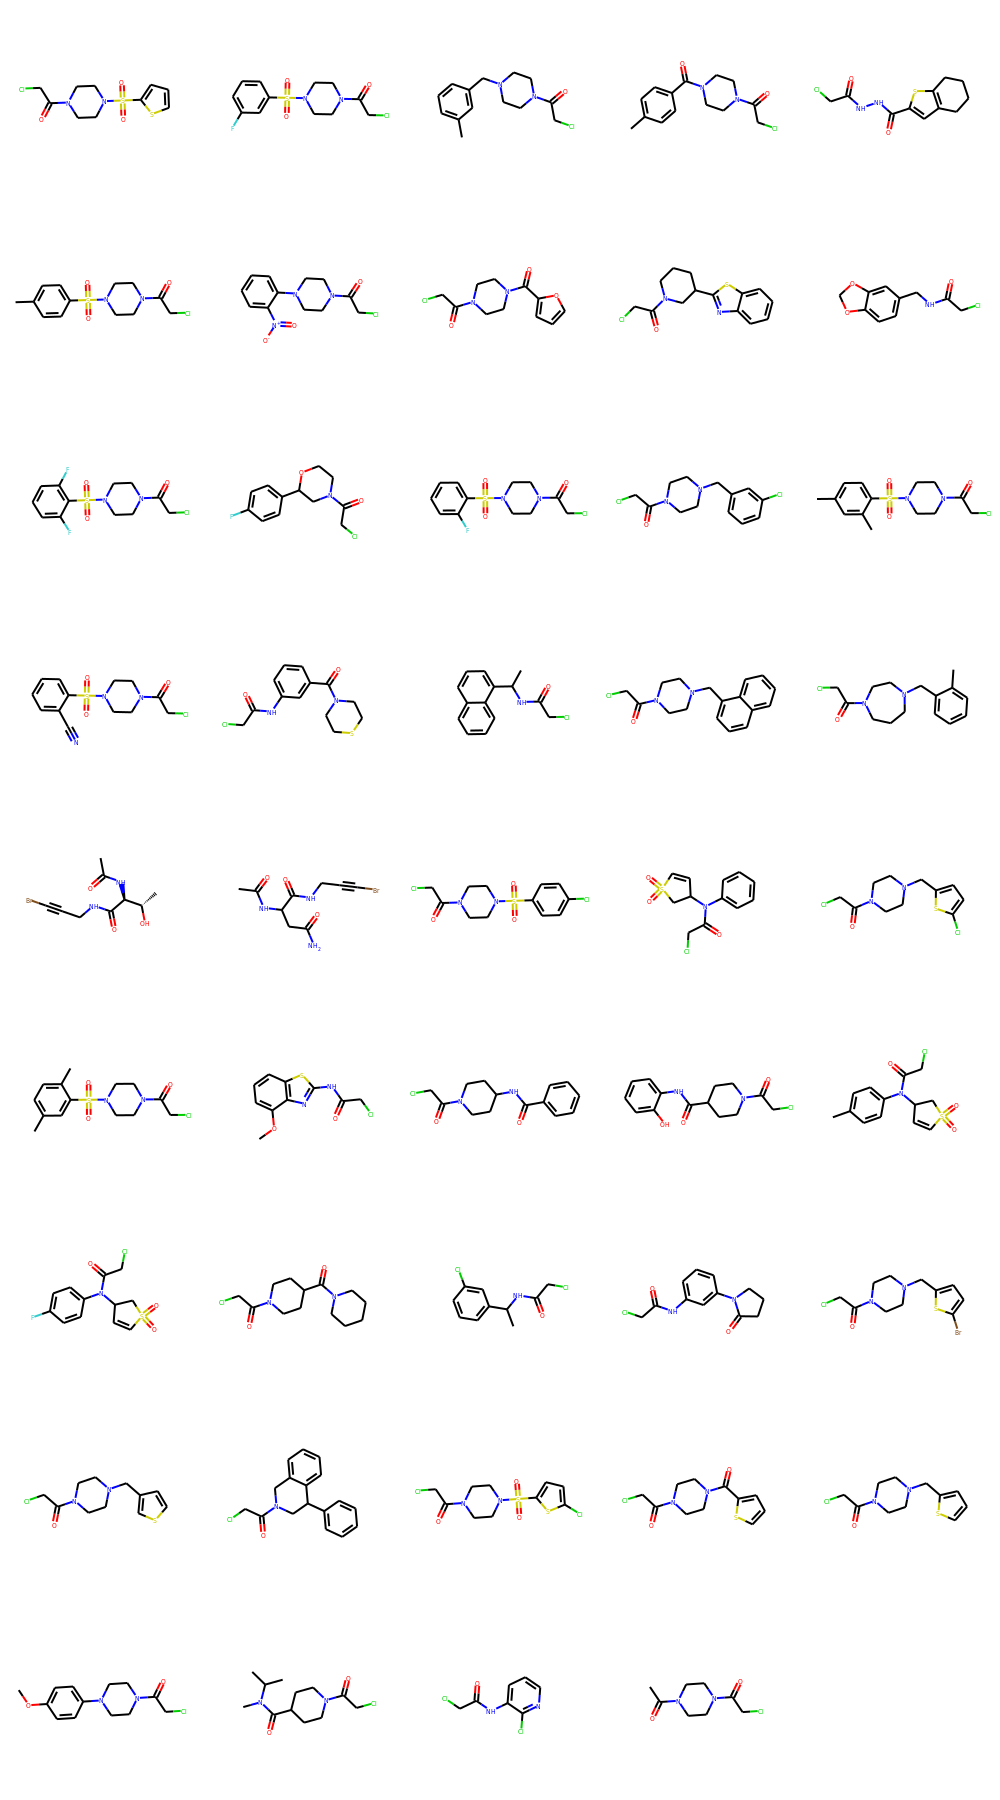

<IPython.core.display.Javascript object>

In [25]:
Draw.MolsToGridImage(df_frag.mol, molsPerRow=5)

In [26]:
# save molecules to sdf
fname = "covalent_fragments"
w = Chem.SDWriter(str(DATADIR / "fragments" / f"{fname}_2D.sdf"))
for m in df_frag.mol:
    w.write(m)
w.close()

<IPython.core.display.Javascript object>

In [39]:
# generate 3D if needed
# w = Chem.SDWriter(str(DATADIR / "fragments" / f"{fname}_3D.sdf"))
# for m in df_frag.mol3D: w.write(m)
# w.close()

<IPython.core.display.Javascript object>